# Sample anon data and plot histograms for scores distribution

In [7]:
#@title Auth {display-mode: "form"}
from google.colab import auth
auth.authenticate_user()

In [8]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as pyplot
import seaborn
from google.cloud.bigquery import magics
magics.context.project = 'data-lake-prod-223818'

In [9]:
# get data from BigQuery tables
%%bigquery scores_bq --verbose
(select consumer_id, campaignid, prosper_income, pmi8_score, pmi7_score, response_score, remail_response_score
, epd_score
, dmr
, pmix_score
from PA_campaign.ro2104_scores
order by farm_fingerprint(concat(cast(consumer_id as string), cast(sequence_number as string)))
limit 100000) -- check the size of DM scoring histogram sample size
union all
(select consumer_id, campaignid, prosper_income, pmi8_score, pmi7_score, response_score, remail_response_score
, epd_score
, dmr
, pmix_score
from PA_campaign.ro2105_scores
order by farm_fingerprint(concat(cast(consumer_id as string), cast(sequence_number as string)))
limit 100000) -- check the size of DM scoring histogram sample size
union all 
(select consumer_id, campaignid, prosper_income, pmi8_score, pmi7_score, response_score, remail_response_score
, epd_score
, dmr
, pmix_score
from PA_campaign.ro2106_scores
order by farm_fingerprint(concat(cast(consumer_id as string), cast(sequence_number as string)))
limit 100000) -- check the size of DM scoring histogram sample size
union all
(select consumer_id, campaignid, prosper_income, pmi8_score, pmi7_score, response_score, remail_response_score
, epd_score
, dmr
, pmix_score
from PA_campaign.ro2107_scores
order by farm_fingerprint(concat(cast(consumer_id as string), cast(sequence_number as string)))
limit 100000) -- check the size of DM scoring histogram sample size

Executing query with job ID: 8485c97a-ad67-42b4-b1b3-30f5610bd99e
Query executing: 30.40s
Query complete after 31.02s


In [10]:
HISTOGRAM_BINS = 20

In [11]:
def density_plot(plot_data, campaigns, columns, title):
    # create density plot
    for campaign in campaigns:
        for column in columns:
            plot = seaborn.distplot(plot_data.loc[plot_data['campaignid']==campaign, [column]], hist = False, kde = True, kde_kws = {"linewidth": 1, "shade": True}, label = str(campaign)+'_'+column)
            #plot = seaborn.distplot(plot_data.loc[plot_data['campaignid']==campaign, [column]], hist = True, kde = False, label = str(campaign)+'_'+column)


    # formatting
    pyplot.legend(prop={"size": 10}, title = "")
    pyplot.title("Density Plot: {}".format(title))
    pyplot.xlabel(title)
    pyplot.savefig(title+'.png', dpi=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


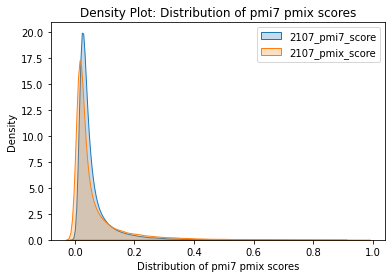

In [25]:
density_plot(scores_bq, [2107], ['pmi7_score', 'pmix_score'], 'Distribution of pmi7 pmix scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

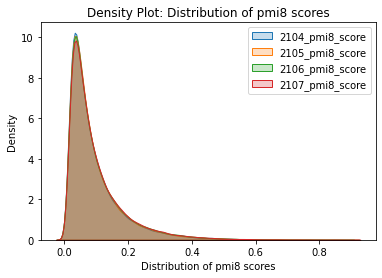

In [13]:
density_plot(scores_bq,[2104,2105,2106,2107],['pmi8_score'], 'Distribution of pmi8 scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

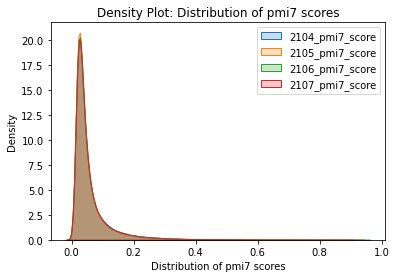

In [14]:
density_plot(scores_bq,[2104,2105,2106,2107],['pmi7_score'], 'Distribution of pmi7 scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

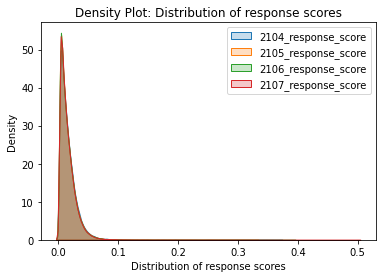

In [15]:
density_plot(scores_bq,[2104,2105,2106,2107],['response_score'], 'Distribution of response scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

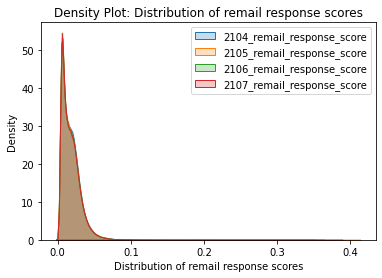

In [16]:
density_plot(scores_bq,[2104,2105,2106,2107],['remail_response_score'], 'Distribution of remail response scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

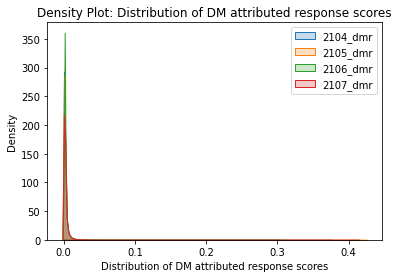

In [17]:
density_plot(scores_bq,[2104,2105,2106,2107],['dmr'], 'Distribution of DM attributed response scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

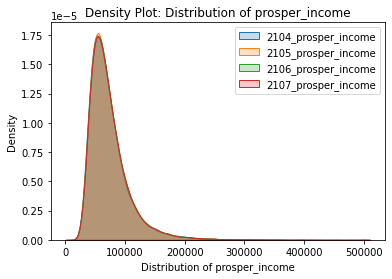

In [18]:
density_plot(scores_bq,[2104,2105,2106,2107],['prosper_income'], 'Distribution of prosper_income')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

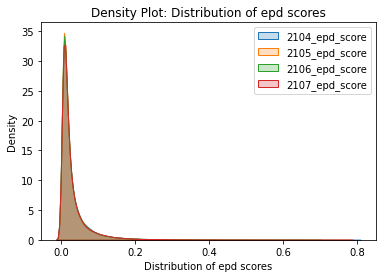

In [19]:
density_plot(scores_bq,[2104,2105,2106,2107],['epd_score'], 'Distribution of epd scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

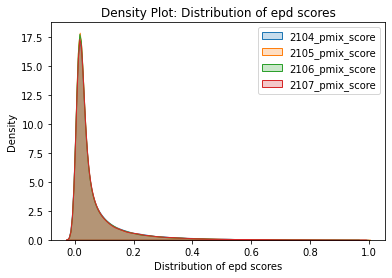

In [20]:
density_plot(scores_bq,[2104,2105,2106,2107],['pmix_score'], 'Distribution of epd scores')

In [21]:
py.quantile(scores_bq.loc[scores_bq['campaignid']==2104, 'dmr'], [0,0.25, 0.5, 0.75,1])

array([1.85185572e-04, 8.97557580e-04, 1.38467529e-03, 2.41649448e-03,
       3.74165975e-01])

In [22]:
py.quantile(scores_bq.loc[scores_bq['campaignid']==2105, 'dmr'], [0,0.25, 0.5, 0.75,1])

array([2.39549047e-04, 9.82030573e-04, 1.42965213e-03, 2.39816776e-03,
       4.23821463e-01])

In [23]:
py.quantile(scores_bq.loc[scores_bq['campaignid']==2106, 'dmr'], [0,0.25, 0.5, 0.75,1])

array([2.25573329e-04, 9.92052695e-04, 1.44570574e-03, 2.45297586e-03,
       3.02677165e-01])

In [24]:
py.quantile(scores_bq.loc[scores_bq['campaignid']==2107, 'dmr'], [0,0.25, 0.5, 0.75,1])

array([2.35127362e-04, 9.96738244e-04, 1.45568848e-03, 2.47470737e-03,
       4.12674024e-01])